In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
#number of output neurons and also the classes available for classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


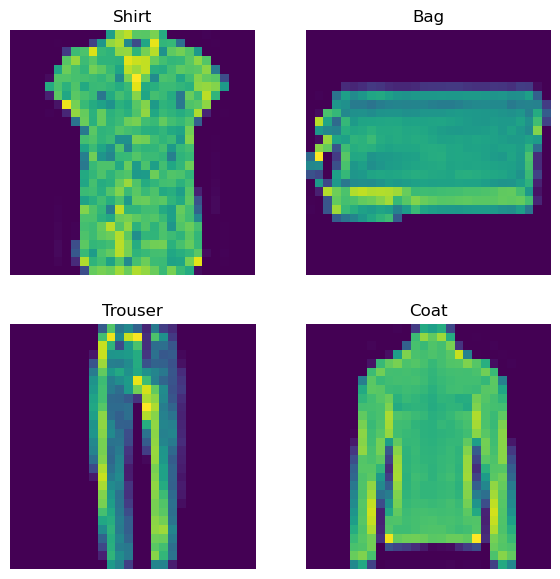

In [41]:
# plotting random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index])
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
    plt.savefig('ImageClasses.jpg')


In [6]:
#model creation
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# flattening the matrix into a 784 vector
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3386 - accuracy: 0.1011 - val_loss: 2.2905 - val_accuracy: 0.1128
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3024 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [7]:
#normalizing the data as the modle performed very poorly on the training data
train_data.min(),train_data.max()

(0, 255)

In [8]:
train_data = train_data/255.0
test_data = test_data/255.0

In [9]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# flattening the matrix into a 784 vector
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 954us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accurac

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))


Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5534 - accuracy: 0.8033 - val_loss: 0.5066 - val_accuracy: 0.8237
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4602 - accuracy: 0.8367 - val_loss: 0.5491 - val_accuracy: 0.8116
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4467 - accuracy: 0.8425 - val_loss: 0.4838 - val_accuracy: 0.8241
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4285 - accuracy: 0.8495 - val_loss: 0.4828 - val_accuracy: 0.8322
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4227 - accuracy: 0.8508 - val_loss: 0.4939 - val_accuracy: 0.8326
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4162 - accuracy: 0.8540 - val_loss: 0.5223 - val_accuracy: 0.8157
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4126 - accuracy: 0.8547 - val_loss: 0.5020 - val_accuracy:

In [18]:
#predictions
y_prob  = model_3.predict(test_data)

313/313 [==============================] - 1s 780us/step


In [19]:
y_prob

array([[1.19518035e-25, 2.57350196e-12, 0.00000000e+00, ...,
        1.74967900e-01, 1.33112236e-03, 8.17278624e-01],
       [2.82327877e-04, 7.42494303e-05, 9.89501178e-01, ...,
        2.98397347e-36, 1.44444016e-07, 5.47258816e-19],
       [6.54201248e-13, 9.99999523e-01, 1.37514825e-14, ...,
        0.00000000e+00, 4.43431020e-07, 4.56288112e-17],
       ...,
       [4.32873331e-02, 1.42711519e-06, 1.08026164e-02, ...,
        5.07564191e-03, 9.17572379e-01, 9.43809107e-04],
       [2.19537947e-11, 9.99991179e-01, 6.27759433e-12, ...,
        0.00000000e+00, 8.68603911e-06, 4.76495949e-16],
       [3.66133244e-14, 3.65202335e-13, 1.06266694e-18, ...,
        1.11635124e-07, 5.07534726e-12, 5.18724366e-14]], dtype=float32)

In [20]:
y_preds = y_prob.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_preds)

array([[761,   1,  14,  79,   1,   2, 130,   0,  12,   0],
       [  2, 960,   2,  29,   3,   0,   4,   0,   0,   0],
       [  8,   4, 741,   9, 156,   0,  79,   0,   3,   0],
       [ 15,   9,  21, 856,  59,   1,  34,   0,   5,   0],
       [  0,   2, 106,  18, 838,   2,  32,   0,   2,   0],
       [  0,   0,   0,   0,   0, 913,   2,  45,   3,  37],
       [117,   1, 125,  50, 164,   1, 533,   0,   9,   0],
       [  0,   0,   0,   0,   0,  19,   0, 941,   1,  39],
       [  0,   1,   5,   3,   5,   4,  39,   4, 939,   0],
       [  0,   0,   0,   0,   0,   9,   1,  33,   0, 957]], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

confusion_matrix(test_labels,y_preds)

array([[761,   1,  14,  79,   1,   2, 130,   0,  12,   0],
       [  2, 960,   2,  29,   3,   0,   4,   0,   0,   0],
       [  8,   4, 741,   9, 156,   0,  79,   0,   3,   0],
       [ 15,   9,  21, 856,  59,   1,  34,   0,   5,   0],
       [  0,   2, 106,  18, 838,   2,  32,   0,   2,   0],
       [  0,   0,   0,   0,   0, 913,   2,  45,   3,  37],
       [117,   1, 125,  50, 164,   1, 533,   0,   9,   0],
       [  0,   0,   0,   0,   0,  19,   0, 941,   1,  39],
       [  0,   1,   5,   3,   5,   4,  39,   4, 939,   0],
       [  0,   0,   0,   0,   0,   9,   1,  33,   0, 957]], dtype=int64)

In [34]:
def plot_random_img(model,image,true_labels,classes):
    
    i = random.randint(0,len(image))
    target_image = image[i]
    pred_prob = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_prob.argmax()]
    true_label = classes[true_labels[i]]
    
    plt.imshow(target_image)
    
    if pred_label==true_label:
        color='green'
    else:
        color='red'
    
    plt.xlabel("Pred: {} True: {}".format(pred_label,true_label),color=color)

1/1 [==============================] - 0s 24ms/step


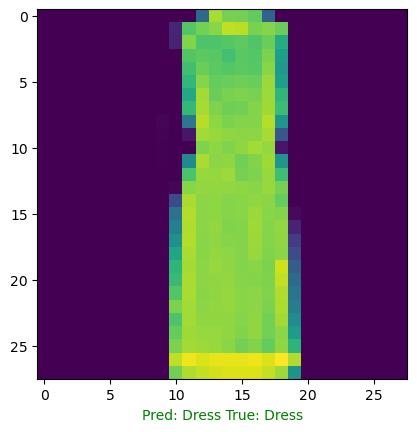

In [36]:
plot_random_img(model_3,test_data,test_labels,class_names)

In [37]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 25)                19625     
                                                                 
 dense_13 (Dense)            (None, 25)                650       
                                                                 
 dense_14 (Dense)            (None, 10)                260       
                                                                 
Total params: 20,535
Trainable params: 20,535
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_3.save('final_model.h5')